## Projeto de Segmentação
### Projeto de Segmentação para identificar diferentes perfis de consumo em um grupo de clientes de uma loja online.

##### 0.1 Importando Bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from datetime import datetime
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

#### 0.2 Carregando e Visualizando os dados

In [3]:
#Lendo o Dataset
dados = pd.read_csv('marketing_campaign.csv', sep='\t')
print("Número de Instâncias:", len(dados))
dados.head()

Número de Instâncias: 2240


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [4]:
# Definindo a coluna 'ID' como o índice
dados = dados.set_index('ID')

In [5]:
# Removendo as colunas indesejadas
dados2 = dados.drop(columns=['NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'])

# Exibindo as primeiras linhas do DataFrame para verificar as mudanças
dados2


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
ID,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4
2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2
4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10
6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4
5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4
4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5
7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13


#### 0.3 Estrutura dos dados (Colunas ou Variáveis)

In [6]:
dados2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2240 entries, 5524 to 9405
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   int

In [7]:
# Removendo as variaveis faltantes 
dados2 = dados2.dropna()
print("O número total de dados após remover as linhas com valores ausentes é:", len(dados2))

O número total de dados após remover as linhas com valores ausentes é: 2216


In [8]:
# Converter a coluna 'Dt_Customer' para o tipo datetime
dados2['Dt_Customer'] = pd.to_datetime(dados2['Dt_Customer'], format='%d-%m-%Y')

# Obter o ano atual
current_year = dados2['Dt_Customer'].max().year

# Calcular a idade e criar uma nova coluna 'Age'
dados2['Age'] = current_year - dados2['Year_Birth']

# Reorganizar as colunas para que 'Age' seja a primeira
cols = ['Age'] + [col for col in dados2.columns if col != 'Age']
dados2 = dados2[cols]

# Obter a data atual
current_date = dados2['Dt_Customer'].max()

# Calcular o número de dias desde 'Dt_Customer' até a data atual
dados2['Days_Customer'] = (current_date - dados2['Dt_Customer']).dt.days

# Reorganizar as colunas para que 'Days_Customer' seja a terceira coluna
cols = list(dados2.columns)
cols.insert(2, cols.pop(cols.index('Days_Customer')))
dados2 = dados2[cols]

# Apagar as colunas 'Year_Birth' e 'Dt_Customer'
dados2 = dados2.drop(columns=['Year_Birth', 'Dt_Customer'])

# Exibindo as primeiras linhas do DataFrame para verificar a nova coluna
dados2


,Age,Days_Customer,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
ID,,,,,,,,,,,,,,,,,,
5524,57,663,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4
2174,60,113,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2
4141,49,312,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10
6182,30,139,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4
5324,33,161,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10870,47,381,Graduation,Married,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4
4001,68,19,PhD,Together,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5
7270,33,155,Graduation,Divorced,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13


In [9]:
dados2.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2216.0,45.179603,11.985554,18.0,37.0,44.0,55.00,121.0
Days_Customer,2216.0,353.521209,202.434667,0.0,180.0,355.5,529.00,699.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.0,51381.5,68522.00,666666.0
Kidhome,2216.0,0.441787,0.536896,0.0,0.0,0.0,1.00,2.0
Teenhome,2216.0,0.505415,0.544181,0.0,0.0,0.0,1.00,2.0
Recency,2216.0,49.012635,28.948352,0.0,24.0,49.0,74.00,99.0
MntWines,2216.0,305.091606,337.327920,0.0,24.0,174.5,505.00,1493.0
MntFruits,2216.0,26.356047,39.793917,0.0,2.0,8.0,33.00,199.0
MntMeatProducts,2216.0,166.995939,224.283273,0.0,16.0,68.0,232.25,1725.0
MntFishProducts,2216.0,37.637635,54.752082,0.0,3.0,12.0,50.00,259.0


In [10]:
# Eliminando as linhas onde 'Income' é igual ou maior que 100.000
dados2 = dados2[dados2['Income'] < 100000]


#### Análise Exploratória e Descritiva
#### 1.0 Relações entre Variáveis


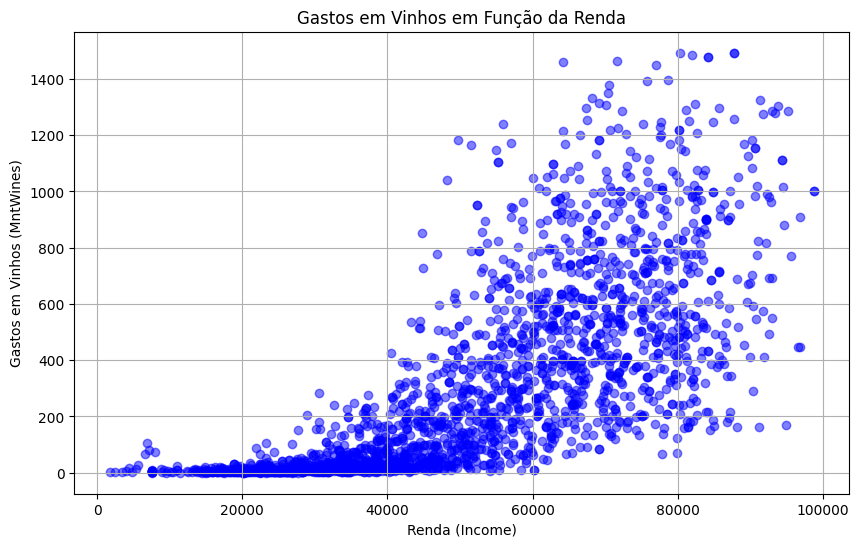

In [11]:
# Criação de gráfico de dispersão para gastos em vinhos em função da renda

# Criar o gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(dados2['Income'], dados2['MntWines'], color='blue', alpha=0.5)

# Adicionar rótulos e título
plt.title('Gastos em Vinhos em Função da Renda')
plt.xlabel('Renda (Income)')
plt.ylabel('Gastos em Vinhos (MntWines)')

# Exibir o gráfico
plt.grid(True)
plt.show()


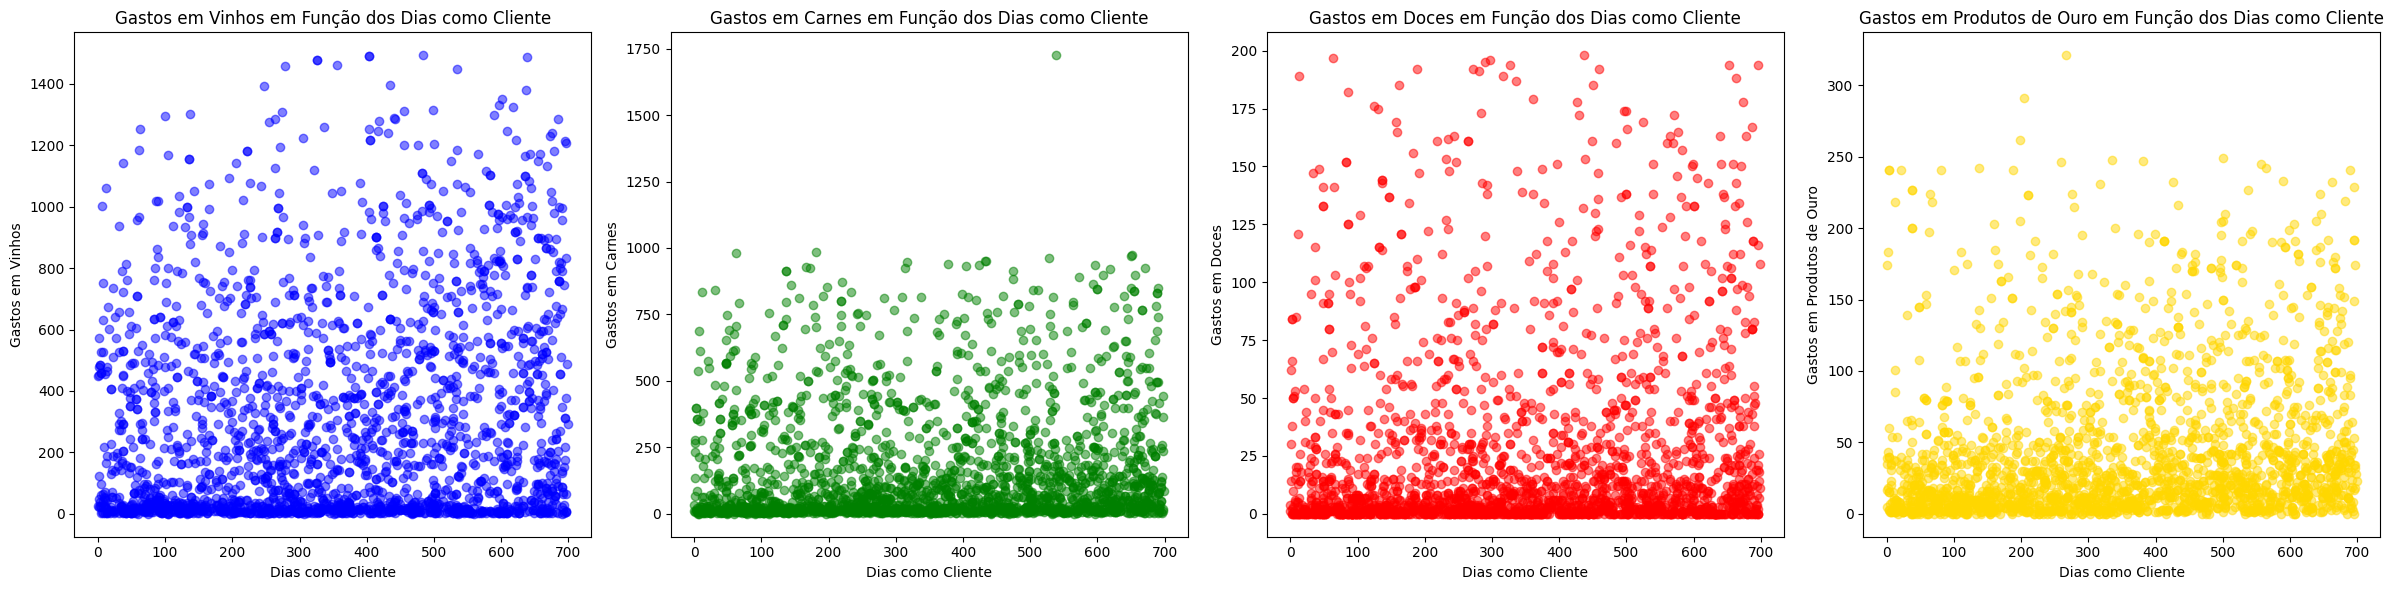

In [12]:

# Criação de gráficos de dispersão para diferentes categorias de produtos em relação a 'Days_Customer'

# Configurações para o layout dos gráficos
plt.figure(figsize=(24, 6))

# Gráfico de dispersão para 'MntWines'
plt.subplot(1, 4, 1)
plt.scatter(dados2['Days_Customer'], dados2['MntWines'], color='blue', alpha=0.5)
plt.title('Gastos em Vinhos em Função dos Dias como Cliente')
plt.xlabel('Dias como Cliente')
plt.ylabel('Gastos em Vinhos')

# Gráfico de dispersão para 'MntMeatProducts'
plt.subplot(1, 4, 2)
plt.scatter(dados2['Days_Customer'], dados2['MntMeatProducts'], color='green', alpha=0.5)
plt.title('Gastos em Carnes em Função dos Dias como Cliente')
plt.xlabel('Dias como Cliente')
plt.ylabel('Gastos em Carnes')

# Gráfico de dispersão para 'MntSweetProducts'
plt.subplot(1, 4, 3)
plt.scatter(dados2['Days_Customer'], dados2['MntSweetProducts'], color='red', alpha=0.5)
plt.title('Gastos em Doces em Função dos Dias como Cliente')
plt.xlabel('Dias como Cliente')
plt.ylabel('Gastos em Doces')

# Gráfico de dispersão para 'MntGoldProds'
plt.subplot(1, 4, 4)
plt.scatter(dados2['Days_Customer'], dados2['MntGoldProds'], color='gold', alpha=0.5)
plt.title('Gastos em Produtos de Ouro em Função dos Dias como Cliente')
plt.xlabel('Dias como Cliente')
plt.ylabel('Gastos em Produtos de Ouro')

# Exibir os gráficos
plt.tight_layout()
plt.show()


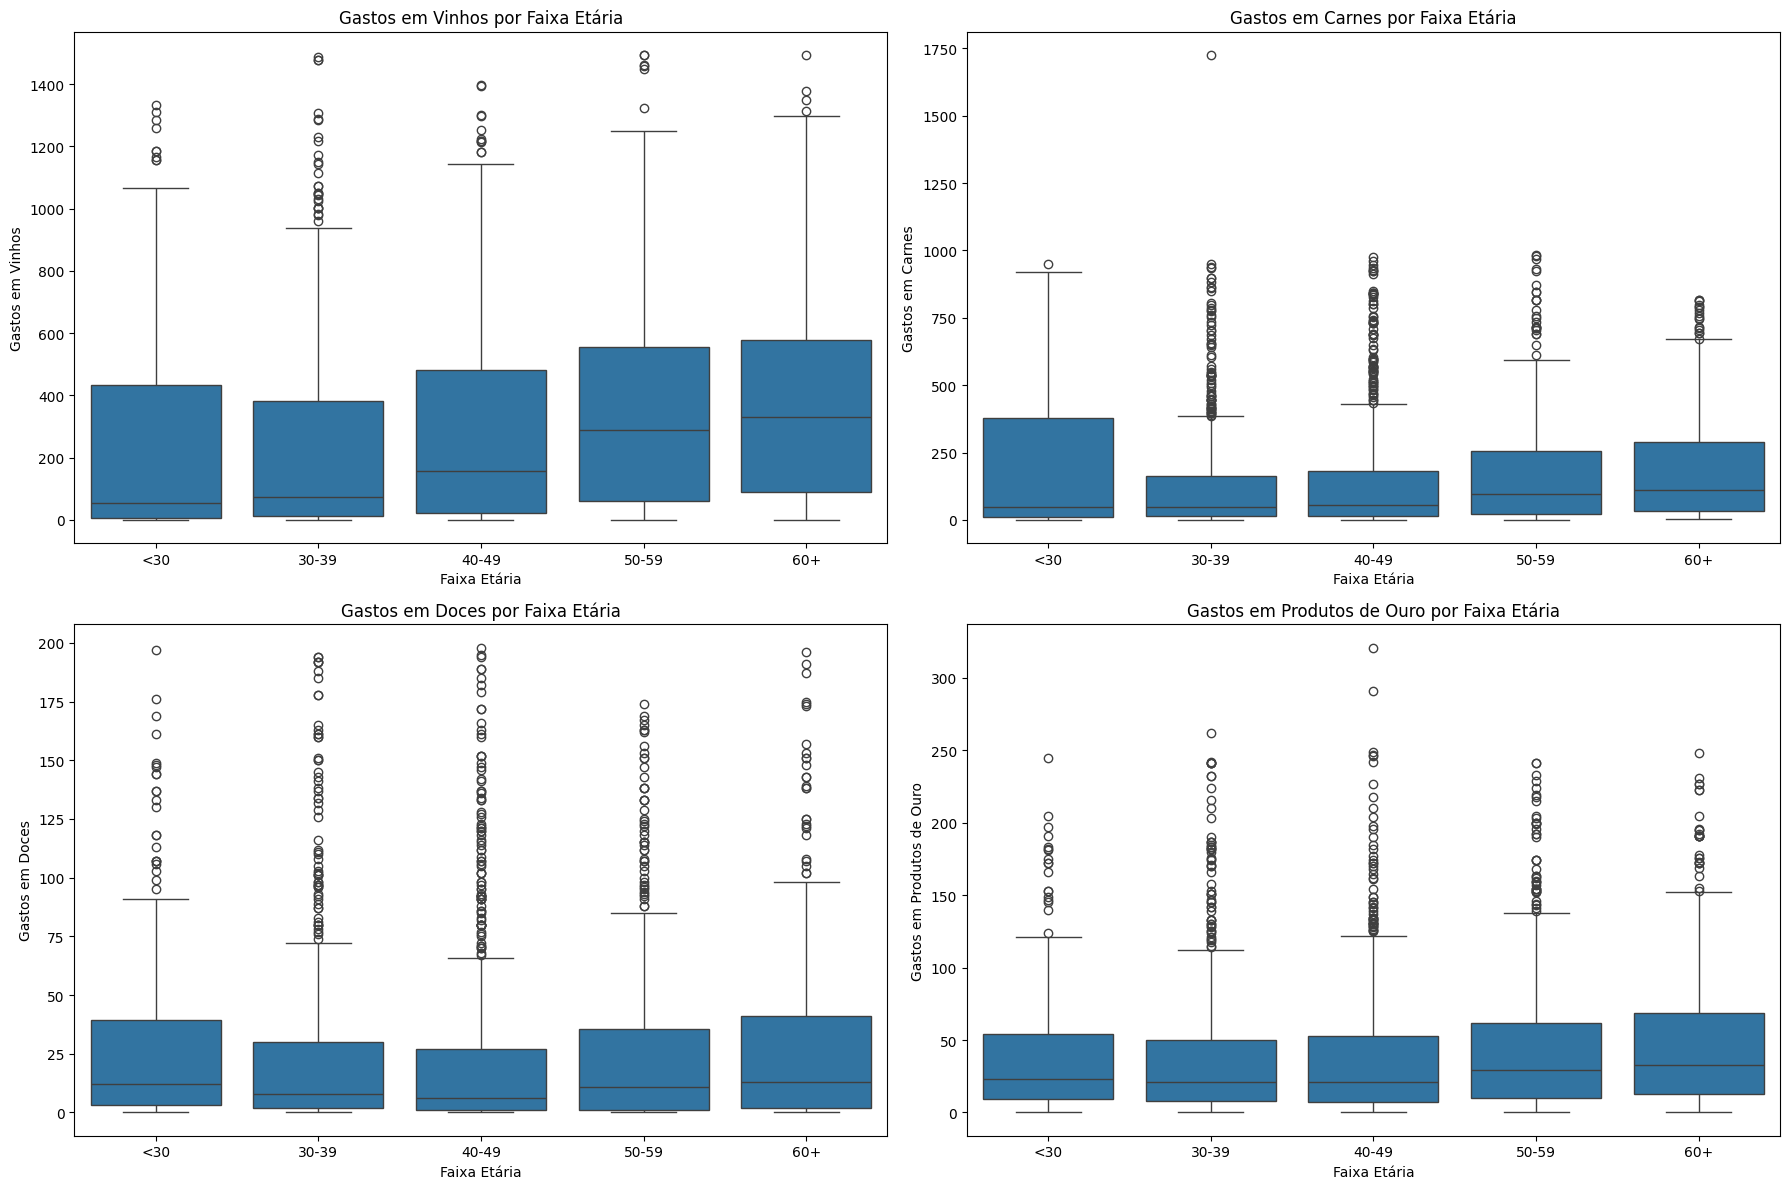

In [13]:

# Criação de faixas etárias
bins = [0, 30, 40, 50, 60, 100]
labels = ['<30', '30-39', '40-49', '50-59', '60+']
dados2['AgeGroup'] = pd.cut(dados2['Age'], bins=bins, labels=labels, right=False)

# Configuração do layout dos gráficos
plt.figure(figsize=(18, 12))

# Box plot para 'MntWines'
plt.subplot(2, 2, 1)
sns.boxplot(x='AgeGroup', y='MntWines', data=dados2)
plt.title('Gastos em Vinhos por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Gastos em Vinhos')

# Box plot para 'MntMeatProducts'
plt.subplot(2, 2, 2)
sns.boxplot(x='AgeGroup', y='MntMeatProducts', data=dados2)
plt.title('Gastos em Carnes por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Gastos em Carnes')

# Box plot para 'MntSweetProducts'
plt.subplot(2, 2, 3)
sns.boxplot(x='AgeGroup', y='MntSweetProducts', data=dados2)
plt.title('Gastos em Doces por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Gastos em Doces')

# Box plot para 'MntGoldProds'
plt.subplot(2, 2, 4)
sns.boxplot(x='AgeGroup', y='MntGoldProds', data=dados2)
plt.title('Gastos em Produtos de Ouro por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Gastos em Produtos de Ouro')

# Ajustar layout e exibir os gráficos
plt.tight_layout()
plt.show()


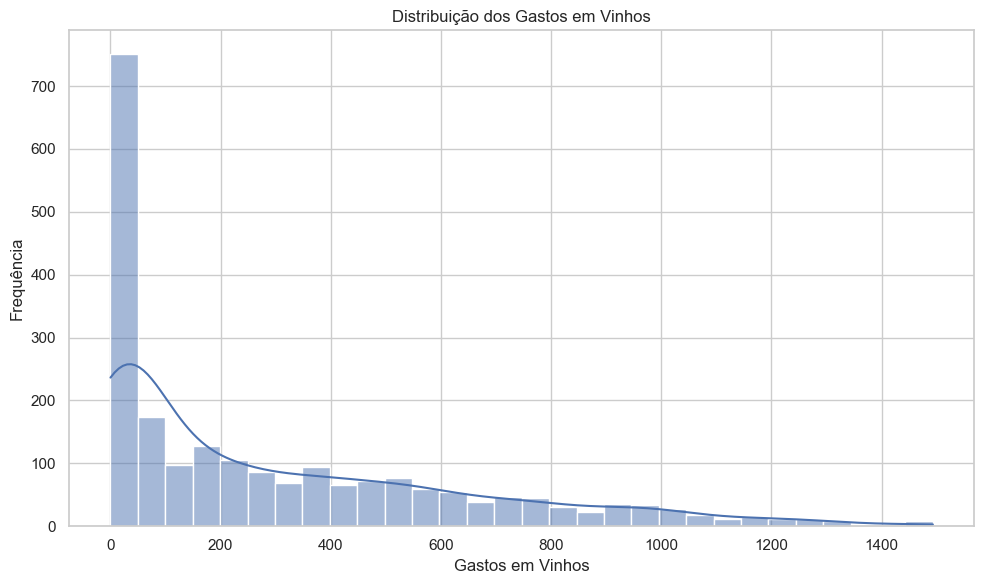

In [14]:

# Configurando o estilo do seaborn
sns.set(style="whitegrid")

# Plotando o histograma dos gastos em vinhos
plt.figure(figsize=(10, 6))
sns.histplot(dados2['MntWines'], bins=30, kde=True)

# Adicionando título e rótulos
plt.title('Distribuição dos Gastos em Vinhos')
plt.xlabel('Gastos em Vinhos')
plt.ylabel('Frequência')

# Exibindo o gráfico
plt.tight_layout()
plt.show()


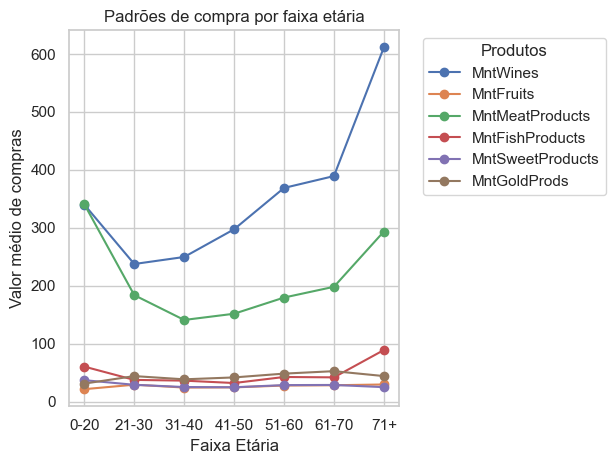

In [15]:
# Supondo que você tenha os dados em um DataFrame chamado dados2

# Definindo os intervalos de idade e os grupos etários
bins = [0, 20, 30, 40, 50, 60, 70, 120]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71+']

# Adicionando uma coluna de grupos etários ao DataFrame
dados2['Faixa Etária'] = pd.cut(dados2['Age'], bins=bins, labels=labels)

# Selecionando apenas as colunas relevantes para o cálculo da média
colunas_compra = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
media_por_faixa_etaria = dados2.groupby('Faixa Etária')[colunas_compra].mean()

# Plotando o gráfico de barras empilhadas
media_por_faixa_etaria.plot(kind='line', marker='o')

# Configurando o título e os rótulos dos eixos
plt.title('Padrões de compra por faixa etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Valor médio de compras')

# Exibindo o gráfico
plt.legend(title='Produtos', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


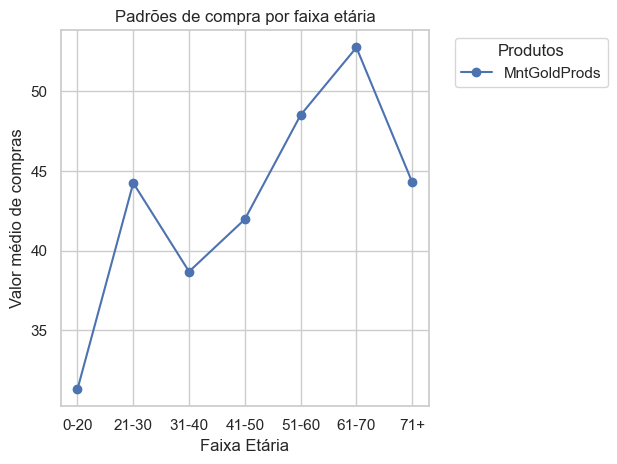

In [16]:
# Supondo que você tenha os dados em um DataFrame chamado dados2

# Definindo os intervalos de idade e os grupos etários
bins = [0, 20, 30, 40, 50, 60, 70, 120]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71+']

# Adicionando uma coluna de grupos etários ao DataFrame
dados2['Faixa Etária'] = pd.cut(dados2['Age'], bins=bins, labels=labels)

# Selecionando apenas as colunas relevantes para o cálculo da média
colunas_compra = ['MntGoldProds']
media_por_faixa_etaria = dados2.groupby('Faixa Etária')[colunas_compra].mean()

# Plotando o gráfico de barras empilhadas
media_por_faixa_etaria.plot(kind='line', marker='o')

# Configurando o título e os rótulos dos eixos
plt.title('Padrões de compra por faixa etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Valor médio de compras')

# Exibindo o gráfico
plt.legend(title='Produtos', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [17]:
# Calculando a correlação entre MntWines e MntMeatProducts
correlacao = dados2[['MntWines', 'MntMeatProducts']].corr().iloc[0, 1]
print(f"Correlação entre MntWines e MntMeatProducts: {correlacao}")

Correlação entre MntWines e MntMeatProducts: 0.5956922921191563


Gastos em vinho e carne tem uma correlação de 0.6 oq indica que muita das pessoas que gastam em carne gastam em vinho ou vice versa. isto pode ser usado para fazer promoções do tipo, compre um produto e ganhe desconto no outro tipo.

In [18]:
# Calculando a correlação entre MntWines e MntSweetProducts
correlacao = dados2[['MntWines', 'MntSweetProducts']].corr().iloc[0, 1]
print(f"Correlação entre MntWines e MntSweetProducts: {correlacao}")


Correlação entre MntWines e MntSweetProducts: 0.3955960880089149


In [19]:
# Calculando a correlação entre MntWines e MntFruits
correlacao = dados2[['MntWines', 'MntFruits']].corr().iloc[0, 1]
print(f"Correlação entre MntWines e MntFruits: {correlacao}")

Correlação entre MntWines e MntFruits: 0.3856095428081371


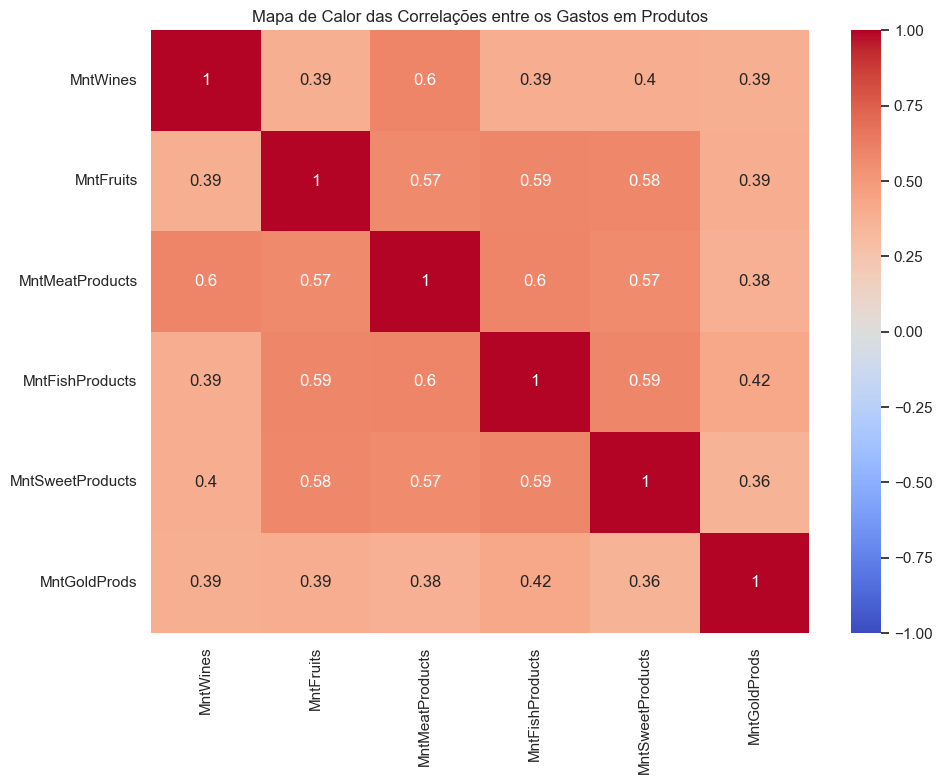

In [20]:

# Selecionando as colunas relevantes
colunas_compra = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
dados_compra = dados2[colunas_compra]

# Calculando a matriz de correlação
matriz_correlacao = dados_compra.corr()

# Plotando o mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Adicionando título
plt.title('Mapa de Calor das Correlações entre os Gastos em Produtos')

# Exibindo o gráfico
plt.tight_layout()
plt.show()


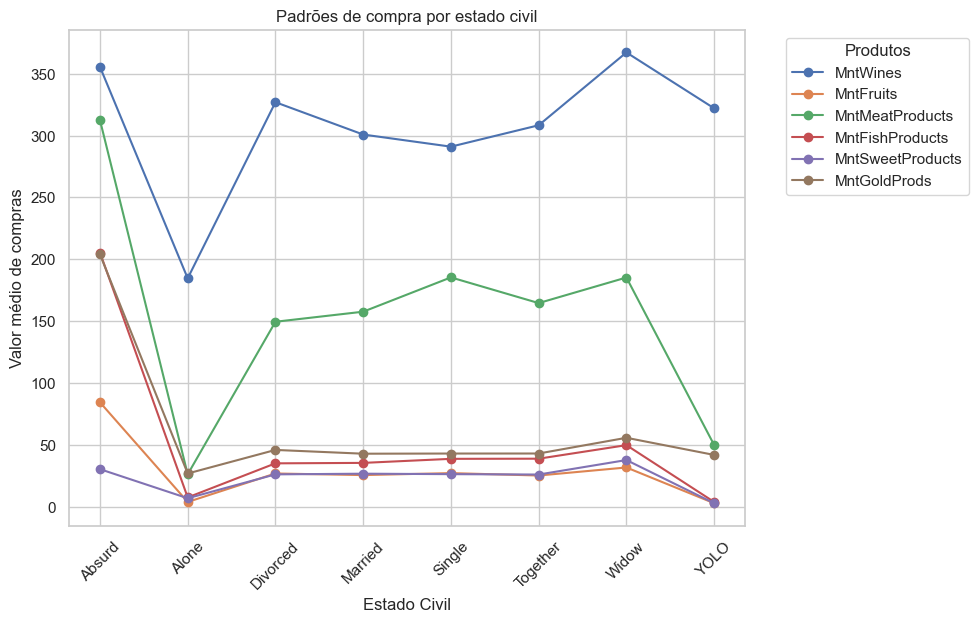

In [21]:

# Selecionando as colunas de interesse
colunas_compra = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Calculando a média de cada variável de compra por estado civil
media_por_estado_civil = dados2.groupby('Marital_Status')[colunas_compra].mean()

# Plotando o gráfico de linhas com marcadores
plt.figure(figsize=(10, 6))
for coluna in colunas_compra:
    plt.plot(media_por_estado_civil.index, media_por_estado_civil[coluna], marker='o', label=coluna)

# Configurando o título e os rótulos dos eixos
plt.title('Padrões de compra por estado civil')
plt.xlabel('Estado Civil')
plt.ylabel('Valor médio de compras')

# Exibindo a legenda e ajustando o layout
plt.legend(title='Produtos', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para facilitar a leitura
plt.show()


In [22]:

# Remover as colunas AgeGroup e Faixa Etária
dados3 = dados2.copy()
dados3 = dados3.drop(columns=['AgeGroup', 'Faixa Etária'])

# Aplicar one-hot encoding nas colunas Education e Marital_Status
dados3 = pd.get_dummies(dados3, columns=['Education', 'Marital_Status'])

# Exibir o DataFrame resultante
dados3


,Age,Days_Customer,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5524,57,663,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,False,False,True,False,False,False,False,False,False,True,False,False,False
2174,60,113,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,False,False,True,False,False,False,False,False,False,True,False,False,False
4141,49,312,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,False,False,True,False,False,False,False,False,False,False,True,False,False
6182,30,139,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,False,False,True,False,False,False,False,False,False,False,True,False,False
5324,33,161,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,False,False,False,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10870,47,381,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,False,False,True,False,False,False,False,False,True,False,False,False,False
4001,68,19,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,False,False,False,False,True,False,False,False,False,False,True,False,False
7270,33,155,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,False,False,True,False,False,False,False,True,False,False,False,False,False


#### 2.0 Modelagem dos Dados
##### 2.0.1 Normalização dos Dados 

In [23]:

# Criar o scaler
scaler = MinMaxScaler()

# Aplicar o scaler para normalizar os dados
dados3_normalized = scaler.fit_transform(dados3)

# Converter o resultado de volta para um DataFrame
dados3_normalized = pd.DataFrame(dados3_normalized, columns=dados3.columns)

# Exibir o DataFrame resultante
dados3_normalized


,Age,Days_Customer,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,0.378641,0.948498,0.581244,0.0,0.0,0.585859,0.425318,0.442211,0.316522,0.664093,0.444444,0.274143,0.200000,0.32,0.357143,0.307692,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.407767,0.161660,0.459715,0.5,0.5,0.383838,0.007368,0.005025,0.003478,0.007722,0.005051,0.018692,0.133333,0.04,0.035714,0.153846,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.300971,0.446352,0.720094,0.0,0.0,0.262626,0.285332,0.246231,0.073623,0.428571,0.106061,0.130841,0.066667,0.32,0.071429,0.769231,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.116505,0.198856,0.256742,0.5,0.0,0.262626,0.007368,0.020101,0.011594,0.038610,0.015152,0.015576,0.133333,0.08,0.000000,0.307692,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.145631,0.230329,0.582841,0.5,0.0,0.949495,0.115874,0.216080,0.068406,0.177606,0.136364,0.046729,0.333333,0.20,0.107143,0.461538,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2198,0.281553,0.545064,0.613033,0.0,0.5,0.464646,0.474883,0.216080,0.105507,0.162162,0.595960,0.769470,0.133333,0.36,0.107143,0.307692,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2199,0.485437,0.027182,0.641792,1.0,0.5,0.565657,0.271936,0.000000,0.017391,0.000000,0.000000,0.024922,0.466667,0.32,0.071429,0.384615,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2200,0.145631,0.221745,0.569322,0.0,0.0,0.919192,0.608171,0.241206,0.125797,0.123552,0.060606,0.074766,0.066667,0.08,0.107143,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2201,0.388350,0.223176,0.695694,0.0,0.5,0.080808,0.286671,0.150754,0.124058,0.308880,0.151515,0.190031,0.133333,0.24,0.178571,0.769231,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


##### 2.0.2 Método do Cotovelo para identificação de número de clusters

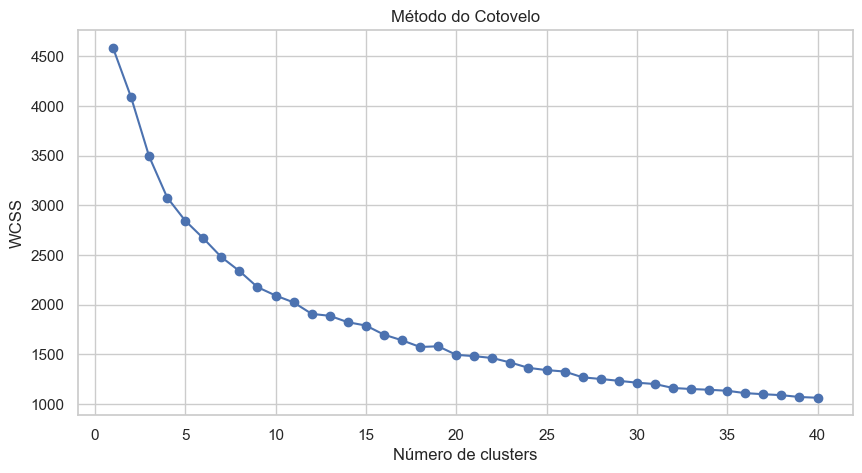

In [24]:

# Método do cotovelo para encontrar o número ideal de clusters
wcss = []  # within-cluster sums of squares

# Testar para k de 1 a 40
for i in range(1, 41):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(dados3_normalized)
    wcss.append(kmeans.inertia_)

# Plotar o gráfico do método do cotovelo
plt.figure(figsize=(10, 5))
plt.plot(range(1, 41), wcss, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()


##### 2.0.3 Método de Clusterização Hierárquica

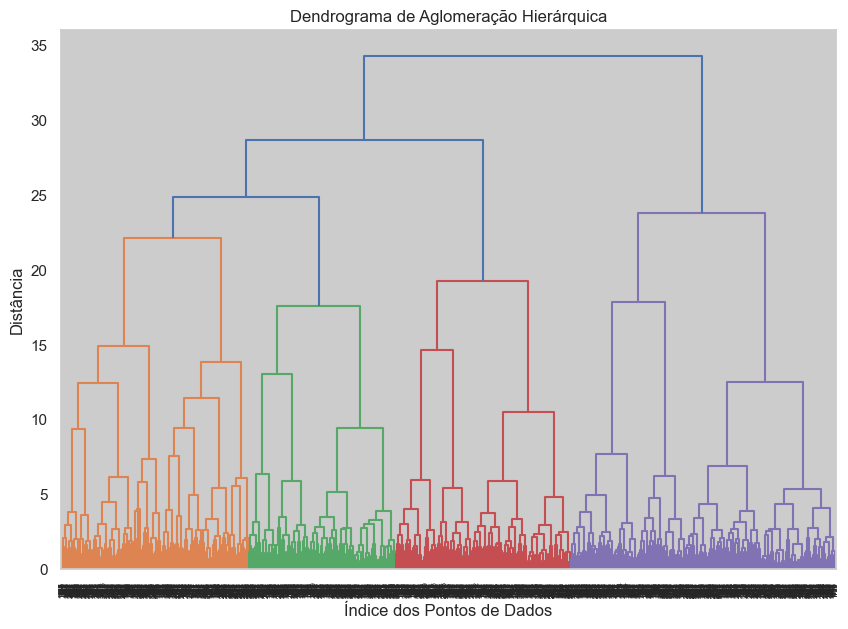

In [25]:
# Realizar a aglomeração hierárquica
linked = linkage(dados3_normalized, method='ward')

# Plotar o dendrograma
plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrograma de Aglomeração Hierárquica')
plt.xlabel('Índice dos Pontos de Dados')
plt.ylabel('Distância')
plt.show()

##### 2.0.4 Clusterização K-Means

In [26]:
report = []

for n_clusters in range(5, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    dados3[f'cluster_{n_clusters}'] = kmeans.fit_predict(dados3_normalized)
    
    for cluster in range(n_clusters):
        cluster_data_indices = dados3[dados3[f'cluster_{n_clusters}'] == cluster].index
        cluster_data = dados3.loc[cluster_data_indices]
        
        num_customers = len(cluster_data)
        percent_customers = (num_customers / len(dados3)) * 100
        avg_wine_spending = cluster_data['MntWines'].mean()
        avg_fruit_spending = cluster_data['MntFruits'].mean()
        avg_meat_spending = cluster_data['MntMeatProducts'].mean()
        avg_fish_spending = cluster_data['MntFishProducts'].mean()
        avg_gold_product_spending = cluster_data['MntGoldProds'].mean()
        
        report.append({
            'Número de Clusters': n_clusters,
            'Cluster': cluster,
            'Número de Clientes': num_customers,
            'Percentual de Clientes (%)': percent_customers,
            'Média de Gasto em Vinhos': avg_wine_spending,
            'Média de Gasto em Frutas': avg_fruit_spending,
            'Média de Gasto em Carne': avg_meat_spending,
            'Média de Gasto em Peixe': avg_fish_spending,
            'Média de Gasto em Produtos Gold': avg_gold_product_spending
        })

report_df = pd.DataFrame(report)

# Salvar o relatório em um arquivo CSV
report_df.to_csv('relatorio_segmentacao.csv', index=False)

# Visualizar o relatório
print(report_df)



    Número de Clusters  Cluster  Número de Clientes  \
0                    5        0                 469   
1                    5        1                 429   
2                    5        2                 425   
3                    5        3                 436   
4                    5        4                 444   
5                    6        0                 383   
6                    6        1                 429   
7                    6        2                 425   
8                    6        3                 282   
9                    6        4                 285   
10                   6        5                 399   
11                   7        0                 200   
12                   7        1                 429   
13                   7        2                 345   
14                   7        3                 436   
15                   7        4                 242   
16                   7        5                 263   
17        

##### 2.0.4 Método do Cotovelo para variáveis selecionadas

In [27]:

# Selecionar as colunas relevantes para a segmentação
purchase_columns = [
    'MntWines', 'MntFruits', 'MntMeatProducts', 
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
    'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'
]
dados4 = dados3_normalized[purchase_columns]



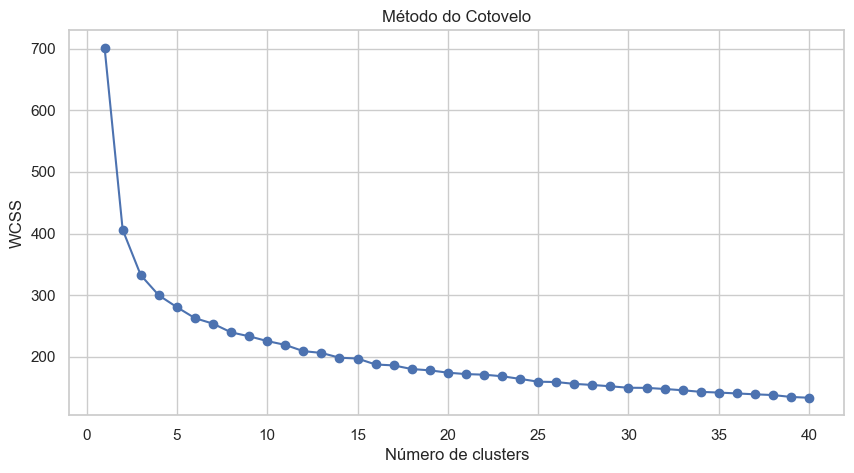

In [28]:

# Método do cotovelo para encontrar o número ideal de clusters
wcss = []  # within-cluster sums of squares

# Testar para k de 1 a 40
for i in range(1, 41):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(dados4)
    wcss.append(kmeans.inertia_)

# Plotar o gráfico do método do cotovelo
plt.figure(figsize=(10, 5))
plt.plot(range(1, 41), wcss, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

##### 2.0.6 Clusterização K-Means para variáveis selecionadas

In [29]:
report = []
n_clusters = []

for n_clusters in range(4, 7):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    dados3[f'cluster_{n_clusters}'] = kmeans.fit_predict(dados4)
    
    for cluster in range(n_clusters):
        cluster_data_indices = dados3[dados3[f'cluster_{n_clusters}'] == cluster].index
        cluster_data = dados3.loc[cluster_data_indices]
        
        num_customers = len(cluster_data)
        percent_customers = (num_customers / len(dados3)) * 100
        avg_wine_spending = cluster_data['MntWines'].mean()
        avg_fruit_spending = cluster_data['MntFruits'].mean()
        avg_meat_spending = cluster_data['MntMeatProducts'].mean()
        avg_fish_spending = cluster_data['MntFishProducts'].mean()
        avg_gold_product_spending = cluster_data['MntGoldProds'].mean()
        
        report.append({
            'Número de Clusters': n_clusters,
            'Cluster': cluster,
            'Número de Clientes': num_customers,
            'Percentual de Clientes (%)': percent_customers,
            'Média de Gasto em Vinhos': avg_wine_spending,
            'Média de Gasto em Frutas': avg_fruit_spending,
            'Média de Gasto em Carne': avg_meat_spending,
            'Média de Gasto em Peixe': avg_fish_spending,
            'Média de Gasto em Produtos Gold': avg_gold_product_spending
        })

report_df = pd.DataFrame(report)

# Salvar o relatório em um arquivo CSV
report_df.to_csv('relatorio_segmentacao2.csv', sep=';', decimal=',', index=False)

# Visualizar o relatório
print(report_df)


    Número de Clusters  Cluster  Número de Clientes  \
0                    4        0                 347   
1                    4        1                 958   
2                    4        2                 482   
3                    4        3                 416   
4                    5        0                 180   
5                    5        1                 955   
6                    5        2                 471   
7                    5        3                 253   
8                    5        4                 344   
9                    6        0                 130   
10                   6        1                 950   
11                   6        2                 436   
12                   6        3                 204   
13                   6        4                 187   
14                   6        5                 296   

    Percentual de Clientes (%)  Média de Gasto em Vinhos  \
0                    15.751248                506.268012   

##### 3.0 Conclusão 

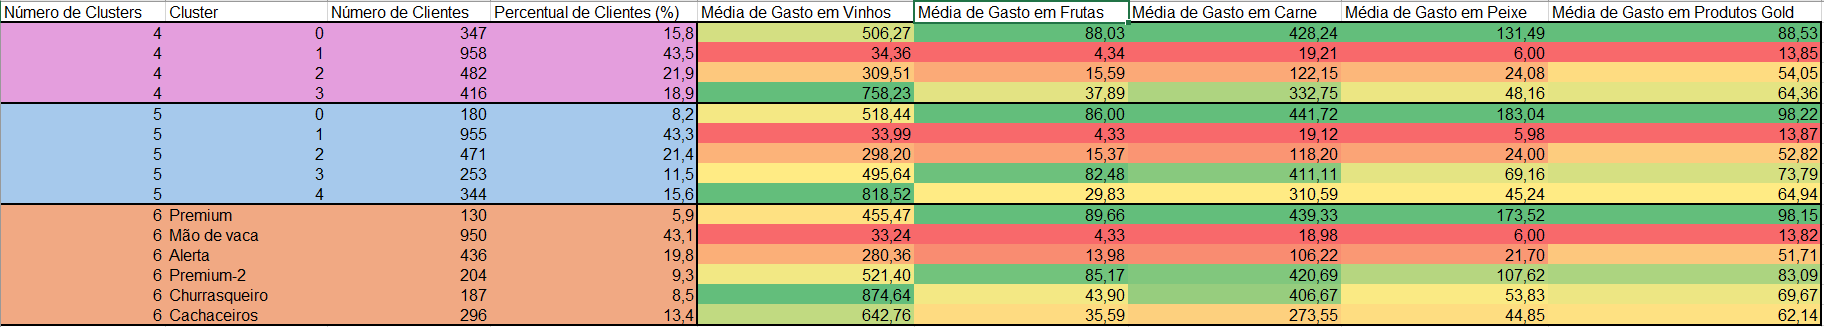